In [ ]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Flatten,Input, Lambda
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import zipfile
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
width,height=224,224
img=cv2.imread('/content/drive/MyDrive/Colab Notebooks/image_classification/train/jeans/jeans10.jpg')
img_resized=cv2.resize(img,(width,height))

In [ ]:
img_resized.shape

(224, 224, 3)

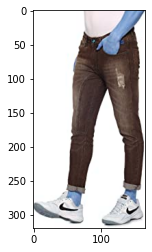

In [ ]:
plt.imshow(img)

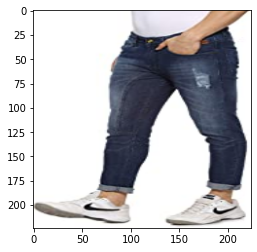

In [ ]:
plt.imshow(cv2.cvtColor(img_resized,cv2.COLOR_BGR2RGB))

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
training_set=test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/image_classification/train',target_size=(width,height),
                                              batch_size=32,class_mode='categorical')

Found 651 images belonging to 3 classes.


In [ ]:
test_set=test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/image_classification/test',target_size=(width,height),
                                              batch_size=10,class_mode='categorical')

Found 30 images belonging to 3 classes.


In [ ]:
IMAGE_SIZE=[224,224]

#add preprocessing layer to the front of VGG
vgg=VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet',include_top=False)

#dont train existing weights
for layer in vgg.layers:
  layer.trainable= False

#useful for getting no.of classes
folders=glob('/content/drive/MyDrive/Colab Notebooks/image_classification/train/*')

#our layers- we can add more if we wants
x=Flatten()(vgg.output)
x=Dense(1000,activation='relu')(x)
prediction=Dense(len(folders),activation='softmax')(x)

#create a model
model=Model(inputs=vgg.input,outputs=prediction)
model.summary()
# use complie
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
folders

['/content/drive/MyDrive/Colab Notebooks/image_classification/train/jeans',
 '/content/drive/MyDrive/Colab Notebooks/image_classification/train/sarees',
 '/content/drive/MyDrive/Colab Notebooks/image_classification/train/trousers']

In [ ]:
r=model.fit_generator(training_set,validation_data=test_set,epochs=3)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
21/21 [==============================] - 355s 17s/step - loss: 3.3966 - accuracy: 0.6697 - val_loss: 0.2035 - val_accuracy: 0.9000
Epoch 2/3
21/21 [==============================] - 342s 16s/step - loss: 0.3903 - accuracy: 0.8740 - val_loss: 0.0252 - val_accuracy: 1.0000
Epoch 3/3
21/21 [==============================] - 341s 16s/step - loss: 0.2272 - accuracy: 0.9155 - val_loss: 0.0806 - val_accuracy: 0.9667


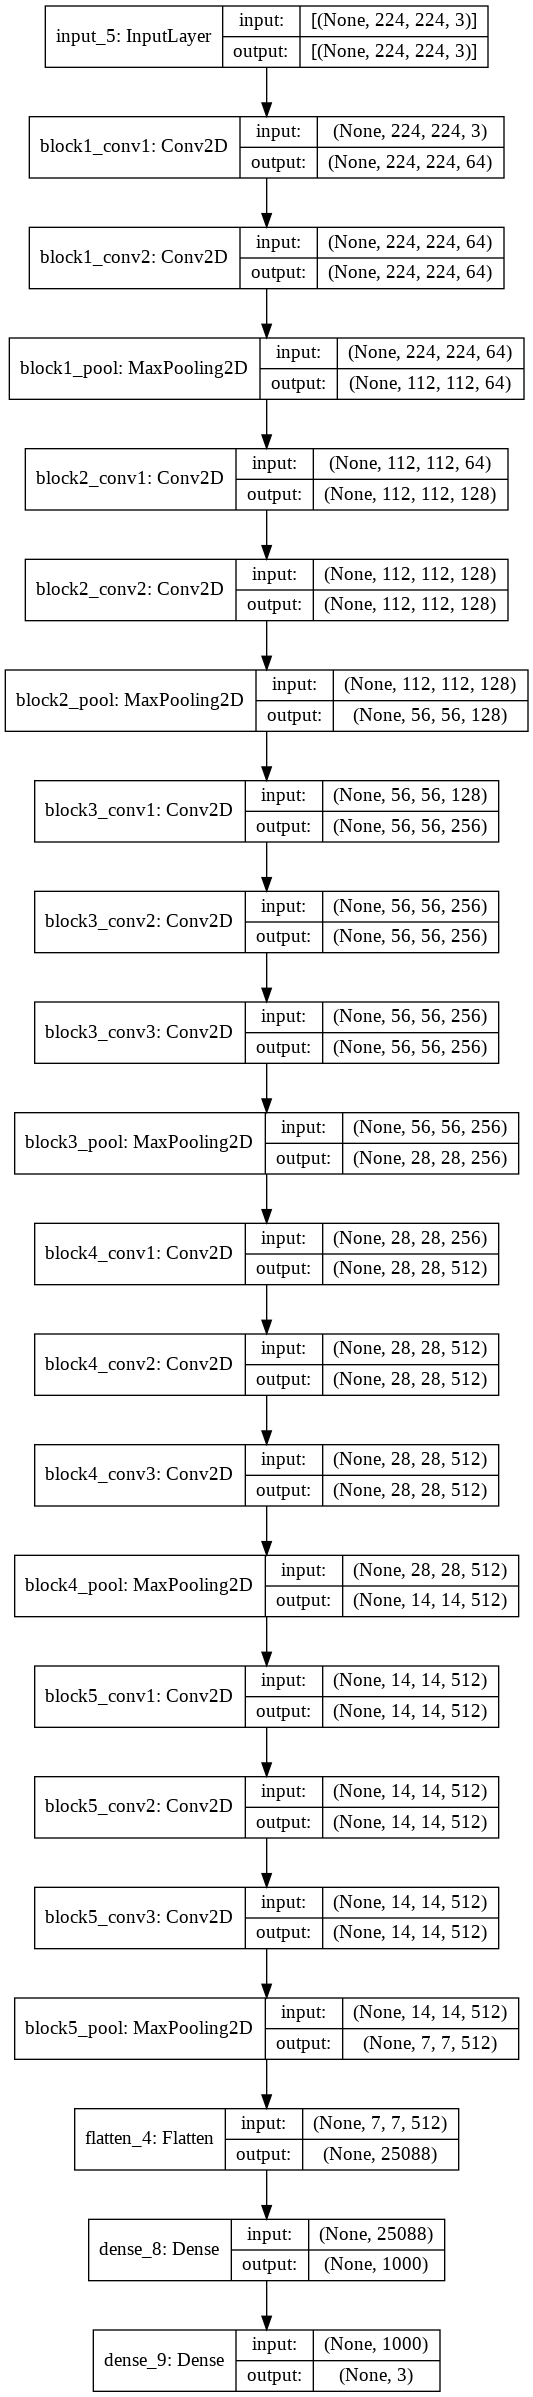

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,to_file='model.png',show_shapes=True,show_layer_names=True)